# 본론2: 스마트팜 및 국내 로봇 산업

## 1. 국내 스마트팜 현황
### 1.1 세계 시장 현황 (참고용)

- 세계 스마트농업 시장규모 및 전망(분야별)

<p aling="center">
    <img src="https://www.mafra.go.kr/sites/home/images/a3/03.png">
</p>

- 세계 스마트농업 시장은 20년 138억 달러에서 25년 220억 달러로 성장 전망 <br> (연평균 9.8%↑)
- 가장 비중이 큰 정밀농업 분야는 20년 64억 달러에서 25년에는 110.7억 달러로 성장 전망 <br> (연평균 11.6%↑)
- 스마트온실과 가축모니터링 분야는 상대적으로 비중이 작으며, 각각 20년 12.5억/14억 달러에서 25년에는 18.5억/22.8억 달러로 성장 전망 <br> (연평균 8.2%↑, 10.2%↑)

### 1.2 국내 시장 현황

- 국내 시장현황

<p aling="center">
    <img src="https://www.mafra.go.kr/sites/home/images/a3/04.png">
</p>

- 우리나라의 스마트농업 시장은 ’20년 2.4억 달러에서 ’25년에는 4.9억 달러로 성장 전망 <br> (연평균 15.5%↑)

## 2. 활용 예상 자료
> 1. [스마트팜 데이터 셋; 스마트팜 관련 시설원예(토마토, 방울토마토, 딸기, 파프리카, 오이, 가지, 참외)](https://data.smartfarmkorea.net/structuredData/dashboard.do?menuId=M06020101)
>       - **스마트팜 정형데이터셋**의 **스마트팜 데이터셋현황**에서  2015년~2022년까지의 자료 확인.  
>       - **농업 경영체 수 현황** 및 **재배 면적 현황** 제시됨. 
>       - **스마트팜 정형데이터셋**의 **농촌진흥청**배너에서  2018년~2021년까지의 **농촌진흥청_스마트팜** 현장 농가 데이터 확인. <br> **(년도)_cultInfo.xlsx**파일에 재배정보(품목, 식부면적, 재식밀도) 포함 <br> **(년도)_sale.xlsx**파일에 판매정보(총출하량 및 금액) 포함
>           - 재식밀도: 단위면적(1m²)당 심은 작물 수
> 2. [스마트팜코리아, (신)기업정보: 21년부터 선정된 농가와 계약 가능한 참여기업](https://www.smartfarmkorea.net/company/companyInfo.do?menuId=M01020210)
>       - 하단 우측의 **엑셀 다운로드**에서 
**기업정보관리_리스트-(다운로드 날짜).xls** 파일 다운로드 가능. <br> **시설 원예 -> 기업명 -> 취급품(ICT제품): 스마트팜**으로 필터링 후 활용 예상.
>       - 단순히 업체명과 항목만 있어 업체별 계약 **부지면적**, 그에 따른 **생산량** 등은 추가 조사가 필요해 보임.

### 2.0 Import

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import ElementNotInteractableException
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.select import Select
import time
from tqdm.notebook import tqdm
from glob import glob
from geopy.geocoders import Nominatim
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
from user_agent import generate_user_agent
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import json
import folium
import warnings
import numpy as np
import requests
import certifi

/tmp/ipykernel_2842/1673064160.py:18: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 2.1 스마트팜 데이터 셋

#### 2.1.1 목표: 기본 정보, 연도별 전국 스마트팜 경영체 수와 전국 재배 면적

|정보명|구분|
|:---|:---|
|경영체 수 (단위:건)|div, class="tot_cnt_mng"|
|전국재배면적 (단위:ha)|div, class="tot_cnt_area"|
|기준년도 선택칸|select, id="searchYear"|
|검색 버튼|li, class="search_btn_wrap"|
|연도 선택|XPATH, //*[@id="searchYear"]/option[7]|

- selenium, 스마트팜 데이터 마트 접속

In [2]:
url = "https://data.smartfarmkorea.net/structuredData/dashboard.do?menuId=M06020101"
driver = webdriver.Chrome(service=Service("../driver/chromedriver"))
driver.get(url)

- selenium, 일관된 html 조건 맞추기 위해 창 크기 최대화.

In [3]:
driver.maximize_window()

- BeautifulSoup, HTML 가져오기

In [4]:
# 웹페이지에 접속하여 HTML 가져오기
html = driver.page_source
response = requests.get("https://google.com", verify=certifi.where())
soup = BeautifulSoup(html, 'html.parser')

##### Error log
SSLError: HTTPSConnectionPool(host='google.com', port=443): Max retries exceeded
[해결](https://www.codeit.kr/community/questions/UXVlc3Rpb246NjQ1OTk0OTRlMGY4Y2Q3MGY0MDZjOTQ2)

In [5]:
html = driver.page_source
response = requests.get("https://google.com")
soup = BeautifulSoup(html, 'html.parser')

- 전국 경영체수 값 가져오기; div, class="tot_cnt_mng"

In [6]:
number_management_organization = soup.find('div', class_='tot_cnt_mng').get_text(strip=True)
print(number_management_organization, '건')

92 건


- 전국 재배 면적 값 가져오기; div, class="tot_cnt_area"

In [7]:
number_management_organization = soup.find('div', class_='tot_cnt_area').get_text(strip=True)
print(number_management_organization,'ha')

452.00 ha


- 연도 선택 칸 클릭; select, id="searchYear"

In [25]:
searchYear = driver.find_element(By.ID, "searchYear")
searchYear.click()

- 연도 선택; XPATH, //*[@id="searchYear"]/option[1~8]

In [26]:
searchYear = driver.find_element(By.XPATH, '//*[@id="searchYear"]/option[1]')
searchYear.click()

- 연도 검색 단추 클릭; class="search_btn_wrap"

In [27]:
searchYear = driver.find_element(By.CLASS_NAME, "search_btn_wrap")
searchYear.click()

- 연도별 전국 경영체 수 및 재배면적

In [42]:
url = "https://data.smartfarmkorea.net/structuredData/dashboard.do?menuId=M06020101"
driver = webdriver.Chrome(service=Service("../driver/chromedriver"))
driver.get(url)

driver.maximize_window()

option_index = 1
input_data = []

while True:
    try:
        searchYear = driver.find_element(By.ID, "searchYear")
        searchYear.click()
        
        option_xpath = f'//*[@id="searchYear"]/option[{option_index}]'
        searchYear_option = driver.find_element(By.XPATH, option_xpath)
        searchYear_option.click()
        
        search_btn = driver.find_element(By.CLASS_NAME, "search_btn_wrap")
        search_btn.click()
        
        # 웹페이지에 접속하여 HTML 가져오기
        html = driver.page_source
        response = requests.get("https://google.com", verify=certifi.where())
        soup = BeautifulSoup(html, 'html.parser')
        
        # 필요한 정보 추출
        selected_year = searchYear_option.get_attribute('value')
        number_management_organization_mng = soup.find('div', class_='tot_cnt_mng').get_text(strip=True)
        number_management_organization_area = soup.find('div', class_='tot_cnt_area').get_text(strip=True)
        
        # 데이터를 input_data에 추가
        input_data.append({'연도': selected_year, '전국 경영체 수 (단위 : 건)': number_management_organization_mng, '전국 재배 면적 (단위 : ha)': number_management_organization_area})
        
        option_index += 1
        
    except NoSuchElementException:
        # NoSuchElementException이 발생하면 루프 종료
        break

# 웹 드라이버 종료
driver.quit()

# DataFrame 생성
df_total_smartfarm = pd.DataFrame(input_data)

In [51]:
# 데이터 형 변환
df_total_smartfarm['전국 경영체 수 (단위 : 건)'] = df_total_smartfarm['전국 경영체 수 (단위 : 건)'].astype(int)
df_total_smartfarm['전국 재배 면적 (단위 : ha)'] = df_total_smartfarm['전국 재배 면적 (단위 : ha)'].astype(float)

In [52]:
# Print or further process the DataFrame
print(df_total_smartfarm)

     연도  전국 경영체 수 (단위 : 건)  전국 재배 면적 (단위 : ha)
0  2015                  3                21.0
1  2016                 17                 7.0
2  2017                 20                 0.0
3  2018                 34                 2.0
4  2019                 62               308.0
5  2020                152               683.0
6  2021                190               952.0
7  2022                 92               452.0


- 위 데이터 프레임을 보면 2017년에 재배 면적 결측치(0헥타르) 존재 -> 원인 파악 필요
- 예상원인  
        1. 해당 사이트에서 결측치를 플롯함  
        2. 실재로 계약 농가를 찾지 못하여 스마트팜에 해당하는 재배 면적이 없었음

- 시각화

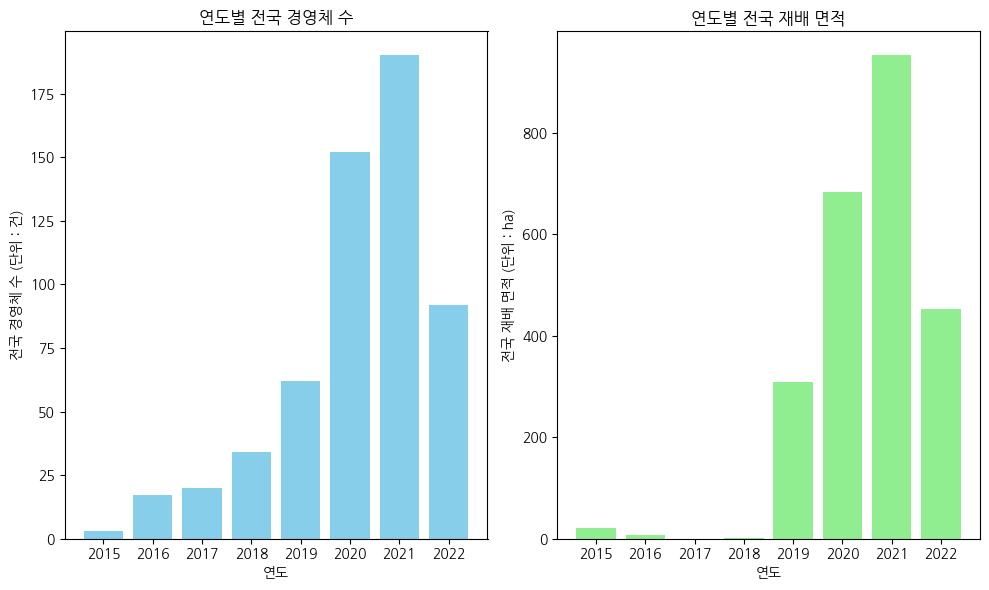

In [53]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

# 경영체 수 그래프
plt.subplot(1, 2, 1)
plt.bar(df_total_smartfarm['연도'], df_total_smartfarm['전국 경영체 수 (단위 : 건)'], color='skyblue')
plt.title('연도별 전국 경영체 수')
plt.xlabel('연도')
plt.ylabel('전국 경영체 수 (단위 : 건)')

# 재배 면적 그래프
plt.subplot(1, 2, 2)
plt.bar(df_total_smartfarm['연도'], df_total_smartfarm['전국 재배 면적 (단위 : ha)'], color='lightgreen')
plt.title('연도별 전국 재배 면적')
plt.xlabel('연도')
plt.ylabel('전국 재배 면적 (단위 : ha)')

plt.tight_layout()
plt.show()

- 21년부터 선정된 사업 대상 농가와 계약이 가능한 참여기업

In [54]:
raw_company_df = pd.read_excel('../data/smartfarm_company_list.xls')

In [55]:
print(raw_company_df)

          분야  기업유형                            유통형태          기업명  \
0    시설원예,축산  면허기업                       정보통신공사 전문  휴테크엘이디 유한회사   
1    시설원예,축산  면허기업         제조(도매),제조(소매),정보통신공사 전문          휴미템   
2       시설원예  일반기업  수입(제조·도매),수입(소매),국내(도매),국내(소매)      화신농건(주)   
3    시설원예,축산  면허기업                          제조(도매)        한화테크윈   
4    시설원예,축산  면허기업                       정보통신공사 전문    한진전자통신(주)   
..       ...   ...                             ...          ...   
631  시설원예,축산  면허기업                       정보통신공사 전문   (유)동아미디어정보   
632     시설원예  면허기업                          제조(소매)    (유)금화이엔에스   
633     시설원예  일반기업                          국내(소매)     (유) 태웅건설   
634     시설원예  일반기업                   제조(도매),국내(도매)     ( 주)시지아이   
635  시설원예,축산  면허기업                       정보통신공사 전문      엔퓨쳐주식회사   

                         소재지                          취급품           연락처  
0         광주광역시 북구 첨단과기로 333                     정보통신공사전문  6.297288e+08  
1           경상북도 상주시 서곡1길 21                   

- 스마트팜 취급 기업으로 데이터 프레임 생성

In [56]:
smartfarm_company_df = raw_company_df[raw_company_df['취급품'].str.contains('스마트팜')]

print(smartfarm_company_df)

          분야  기업유형                                          유통형태          기업명  \
2       시설원예  일반기업                수입(제조·도매),수입(소매),국내(도매),국내(소매)      화신농건(주)   
5       시설원예  일반기업                                 국내(도매),국내(소매)         한울테크   
6       시설원예  일반기업                                 국내(도매),국내(소매)        한울에스씨   
9       시설원예  일반기업                                 국내(도매),국내(소매)        한라자동화   
13      시설원예  일반기업                                 국내(도매),국내(소매)        한국농부들   
..       ...   ...                                           ...          ...   
604     시설원예  면허기업         제조(도매),제조(소매),국내(도매),국내(소매),정보통신공사 전문    (주)다온정보기술   
606     시설원예  일반기업                                        제조(도매)     (주)농정사이버   
607  시설원예,축산  일반기업  제조(도매),제조(소매),수입(제조·도매),수입(소매),국내(도매),국내(소매)    (주)농자재플러스   
614     시설원예  일반기업                                 제조(도매),제조(소매)  (주)글로벌코딩연구소   
630  시설원예,축산  일반기업                                 제조(도매),제조(소매)     (유)린캔패스트   

                           

### 레퍼런스
- [블로그: 국내 및 해외 스마트팜 기업들 현황 분석 자료(2021.10.25)](https://dudonvan.tistory.com/entry/%EA%B5%AD%EB%82%B4-%EB%B0%8F-%ED%95%B4%EC%99%B8-%EC%8A%A4%EB%A7%88%ED%8A%B8%ED%8C%9C-%EA%B8%B0%EC%97%85%EB%93%A4-%ED%98%84%ED%99%A9-%EB%B6%84%EC%84%9D-%EC%9E%90%EB%A3%8C)
    - World Agricultural Equipment; **2015:3조 6천억** -> **2020:5조 4천억**, **14.5% 성장 전망**
    - 국내 스마트팜 상장기업 현황 소개
    - 국내 스마트팜 스타트업 현황 소개

- [블로그: 저작자:NgoMIV, [Market Essay] Ch1. 스마트팜 시장 현황 (2023.03.24)](https://blog.naver.com/PostView.naver?blogId=sdfg511&logNo=223054678862&parentCategoryNo=&categoryNo=87&viewDate=&isShowPopularPosts=true&from=search)
    - Marketsandmarkets(2023); 세계 스마트 농업 시장(Smart Agriculture Market)은 <br> **2023년 162억 달러**에서 **2028년 254억 달러**까지 성장할 것으로 전망. <br> 따라서 CAGR(연평균 복합 성장률 ; 매년 일정한 성장을 가정하고 계산한 평균 성장률)은 7.2%로 추정
    - 국내 시장도 연도별 시장 규모 예측치를 그래프화
    - 연간 자산, 매출액, 당기순이익 정보를 직접 취합하여 스마트팜 관련 기업들을 목록화 <br> [출처 : DART 전자공시, 재가공 / 단위 : 백만 원]
    - 스마트팜 보급 현황 시각화 <br> [출처: 2021년 농림축산식품부의 정책홍보자료]
    - K-스마트팜 수출 경쟁력 <br> 양적 요소(수량, yield), 질적 요소(영양, 수확후관리, 병해충 방제 등), 마케팅(수출, 유통, 기업화 등) 비교 <br>
    [출처: 스마트팜수출연구사업단 :  「지능형 스마트팜 플랫폼 수출연구사업단 동향보고서」(2021)]

- [농림축산식품부 정책홍보, 스마트농업 국내·외 시장 현황 (Marketsandmarkets, 2020)](https://www.mafra.go.kr/home/5281/subview.do)
- [Smart Agriculture Market Size, Marketandmarkets(2023), (자료요청 후 대기 중)](https://www.googleadservices.com/pagead/aclk?sa=L&ai=DChcSEwjfqfbjsYSFAxWr5RYFHcy-BkwYABACGgJ0bA&ase=2&gclid=CjwKCAjwkuqvBhAQEiwA65XxQApZ_RjLxlsKfdKuglz_WTrnIjGGbDxEya5YC0c6ce9LFxKMIAxGRBoCO-oQAvD_BwE&ohost=www.google.com&cid=CAESV-D2m98FNxf8DzUmoPCg73k0Wz03Y7AafJufKSKJW0Daqi6VplJy0sYjsDEnbVRaH4HZymRXZGbX00Vwd4V4HS7MJhb2WKIgwJTBRCuu_TcK_UFeUvt9Fg&sig=AOD64_0TGHRKht0vbqhTBFVzepfWoR0shw&q&nis=4&adurl&ved=2ahUKEwiPiu3jsYSFAxUQjVYBHQVJDw8Q0Qx6BAgGEAE)

~~2. 국내 로봇 산업~~

~~사업체 수 변화 추이~~

~~로봇산업 생산 현황~~

회의(2024.03.20, 17:30~18:20 결과, EDA 프로젝트 흐름 상 관련 없다고 판단.)